## Use this driver notebook to interact with savvy modules

In [1]:
# comment out this import if you would like to see warnings
import warnings; warnings.filterwarnings('ignore')
import copy

from bokeh.plotting import show, output_notebook
import os.path as op
import os
import savvy.data_processing as dp
import savvy.interactive_plots as ip
from savvy.plotting import make_plot, make_second_order_heatmap
import savvy.network_tools as nt

output_notebook()

# read the sensitivity analysis files in the data directory you specify here:
# sa_dict = dp.get_sa_data('../savvy_data/')
# read the sensitivity analysis files from sample data loaded on github:
datapath = op.join(os.getcwd(),'savvy/sample_data_files/')
sa_dict = dp.get_sa_data(datapath)

Loading BokehJS ...

## Interact with first and total order sensitivity index plots for all output measures
Pass a dictionary (generated with `dp.get_sa_data()`) to this function to visualize the first and total order sensitivity indices.

Tweak the plots you would like to see by specifying the following arguments:
- min value: the minimum total order sensitivity value you would like to include in the plot
- show top: limit the plot to the top X sensitivity values (greater than specified minimum)
- show stacked plots: un-check to show S1 and ST separately
- show error bars: uncheck to hide the error bars
- use log axis: uncheck to show a linear axis
- choose parameters to highlight: crtl+click to select multiple parameters you would like to highlight.  These parameters will be highlighted in all the tabs.

When ready to plot, click "Run plot_all_outputs".  Hover over the plotted bars to get more information.

In [2]:
# Plot the first and total order indices for all files in "datapath"
ip.interact_with_plot_all_outputs(sa_dict)

In [4]:
# If you do not want to use the widget interactivity, but still want the ability
# to explore the outputs on tabs, you can use this function and manually pass
# all the arguments to makeplot

# ip.plot_all_outputs(sa_dict, min_val=0.01, top=30)

## Plot the second order indices for all output measures
Pass a dictionary (generated with dp.get_sa_data()) to this function to visualize the second order sensitivities for interacting parameters.

Note that this plot is computationally expensive if you choose a large value for `top`.  If you are choosing a large `top` then at least set `mirror=False` to ease the computational burden.

Hover over the resulting plot for more information.

In [5]:
# Plot the second order plots with tabs for all the options
ip.plot_all_second_order(sa_dict, top=5, mirror=True)

## Graph of the second order interactions and first/total order indices
For a given output measure, plot a graph whose vertices are the first ('S1') or total ('ST') order indices and the edges are the second order interaction indices.

Choose the number of vertices to include in the plot (`top`), and the minimum value of their sensitivities (`min_sens`).  You can also specify the minimim value of 'S2' from second order interactions (`edge_cutoff`).

Change `inline=True` to `False` and the plot will display in a new window where you can interact with it.

**NOTE: `build_graph()` changes the structure of the dataframes it acts on.  This causes problems if you re-run any of the other functions that assume standard SALib structure for those dataframes.  To address this issue we just copy sa_dict to a new object to use here.**

Created a graph with 40 vertices and 780 edges.
Vertices are the top 40 ST values greater than 0.01.
Only S2 values (edges) greater than 0.0 are included.


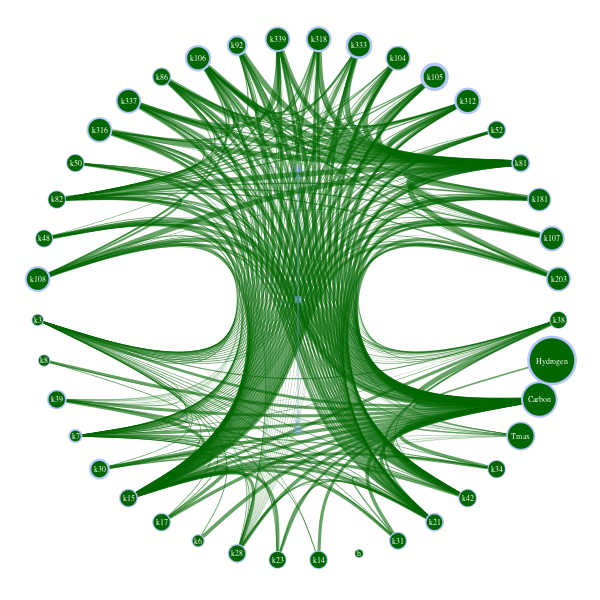

In [6]:
sa_dict_net = copy.deepcopy(sa_dict)
g = nt.build_graph(sa_dict_net['sample-output1'], sens='ST', top=40, min_sens=0.01,
                   edge_cutoff=0.0)
nt.plot_network_circle(g, inline=True)
# test = nt.plot_network_random(g)

## Determine which parameters do not contribute to any output variance

The parameters identified here have sensitivity indices (and confidence intervals) of exactly 0.0, so they do not contribute anything to the variance of any of the model outputs you chose to analyze.  This doesn't necessarily indicate these parameters can be removed from your model, only that they are unimportant for any of the measures you've chosen to examine.

In [7]:
dp.find_unimportant_params('S1', 'savvy/sample_data_files/')
dp.find_unimportant_params('ST', 'savvy/sample_data_files/');

The following 9 parameters have S1==0 for all outputs:
['k182', 'k202', 'k221', 'k241', 'k315', 'k335', 'k344', 'k384', 'k395'] 

The following 99 parameters have ST==0 for all outputs:
['k100', 'k102', 'k113', 'k114', 'k120', 'k122', 'k123', 'k125', 'k126', 'k131', 'k132', 'k133', 'k134', 'k135', 'k137', 'k141', 'k143', 'k144', 'k145', 'k147', 'k149', 'k151', 'k152', 'k153', 'k154', 'k155', 'k158', 'k166', 'k182', 'k195', 'k197', 'k202', 'k216', 'k217', 'k218', 'k219', 'k220', 'k221', 'k222', 'k229', 'k231', 'k237', 'k239', 'k240', 'k241', 'k243', 'k246', 'k249', 'k250', 'k258', 'k260', 'k261', 'k264', 'k271', 'k279', 'k282', 'k283', 'k285', 'k289', 'k303', 'k305', 'k306', 'k315', 'k335', 'k344', 'k346', 'k363', 'k364', 'k365', 'k366', 'k367', 'k368', 'k369', 'k37', 'k370', 'k372', 'k375', 'k380', 'k382', 'k384', 'k387', 'k388', 'k390', 'k395', 'k59', 'k60', 'k64', 'k65', 'k72', 'k74', 'k76', 'k84', 'k85', 'k94', 'k95', 'k96', 'k97', 'k98', 'k99'] 



## Demonstrations of the plotting functions without any interactivity

In [8]:
# demo of making the 1st and total order sensitivity index plot
df = sa_dict['sample-output1'][0]
p = make_plot(df, lgaxis=True, minvalues=0.0, top=30, stacked=True,
              errorbar=True, showS1=True, showST=True)
show(p)

In [9]:
# demo of the basic second order sensitivity index heat map
df2 = sa_dict['sample-output1'][1]
incl_lst = ['Tmax', 'Carbon', 'Hydrogen', 'k38', 'k48', 'k34']
s = make_second_order_heatmap(df2, top=3, mirror=True, name='demo',
                              include=incl_lst)
show(s)